In [115]:
import pandas as pd

In [116]:
df_raw = pd.read_csv('data.csv')
df_raw.drop(columns=['Unnamed: 0'], inplace=True)
df = df_raw.copy()

In [93]:
df.head(10)

,Time,Resource,State,Activity,Expected End Time,Material,Target location
0,14.532972,R3,Breakdownstate_2,start state,44.532972,NaN,NaN
1,23.622187,R1,P1,start state,34.421601,Material_1 instance N.0,NaN
2,34.421601,R1,P1,end state,34.421601,Material_1 instance N.0,NaN
3,34.421601,TR1,TP1,start state,34.682712,Material_1 instance N.0,R1
4,34.682712,TR1,TP1,end state,34.682712,Material_1 instance N.0,R1
5,34.682712,TR1,TP1,start state,34.943823,Material_1 instance N.0,R2
6,34.943823,TR1,TP1,end state,34.943823,Material_1 instance N.0,R2
7,34.943823,R2,P2,start state,49.943823,Material_1 instance N.0,NaN
8,44.532972,R3,Breakdownstate_2,end state,44.532972,NaN,NaN
9,47.596494,R3,Breakdownstate_2,start state,77.596494,NaN,NaN


In [94]:
df.loc[df['Material'] == "Material_2 instance N.26"]

,Time,Resource,State,Activity,Expected End Time,Material,Target location
425,550.308647,R3,P1,start state,569.141651,Material_2 instance N.26,NaN
431,569.141651,R3,P1,end state,569.141651,Material_2 instance N.26,NaN
432,569.141651,TR1,TP1,start state,569.513873,Material_2 instance N.26,R3
433,569.513873,TR1,TP1,end state,569.513873,Material_2 instance N.26,R3
434,569.513873,TR1,TP1,start state,569.774985,Material_2 instance N.26,R2
435,569.774985,TR1,TP1,end state,569.774985,Material_2 instance N.26,R2
436,569.774985,R2,P2,start state,584.774985,Material_2 instance N.26,NaN
443,584.774985,R2,P2,end state,584.774985,Material_2 instance N.26,NaN
445,584.774985,TR1,TP1,start state,585.147207,Material_2 instance N.26,R4
446,585.147207,TR1,TP1,end state,585.147207,Material_2 instance N.26,R4


In [95]:
df.loc[df['Resource'] == "R3"][180::].head(10)

,Time,Resource,State,Activity,Expected End Time,Material,Target location
1190,1425.001687,R3,P3,start interrupt,1457.448705,Material_1 instance N.67,NaN
1209,1455.001687,R3,Breakdownstate_2,end state,1455.001687,NaN,NaN
1210,1455.001687,R3,P1,end interrupt,1470.473768,Material_1 instance N.72,NaN
1211,1455.001687,R3,P3,end interrupt,1487.448705,Material_1 instance N.67,NaN
1212,1455.001687,R3,P1,start state,1470.473768,Material_1 instance N.72,NaN
1213,1455.001687,R3,P3,start state,1487.448705,Material_1 instance N.67,NaN
1220,1470.473768,R3,P1,end state,1470.473768,Material_1 instance N.72,NaN
1221,1470.473768,R3,P1,start state,1487.559774,Material_1 instance N.74,NaN
1228,1474.775101,R3,Breakdownstate_2,start state,1504.775101,NaN,NaN
1229,1474.775101,R3,P1,start interrupt,1487.559774,Material_1 instance N.74,NaN


In [96]:
print(df['Activity'].unique())

['start state' 'end state' 'start interrupt' 'end interrupt']


In [97]:
import pm4py
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"

In [98]:
df['DateTime'] = pd.to_datetime(df['Time'], unit='m')

In [99]:
df['Material_type'] = df['Material'].str[:10]
df['Combined_activity'] = df['State'] + ' ' + df['Activity']
df.head()


,Time,Resource,State,Activity,Expected End Time,Material,Target location,DateTime,Material_type,Combined_activity
0,14.532972,R3,Breakdownstate_2,start state,44.532972,NaN,NaN,1970-01-01 00:14:31.978296330,NaN,Breakdownstate_2 start state
1,23.622187,R1,P1,start state,34.421601,Material_1 instance N.0,NaN,1970-01-01 00:23:37.331240682,Material_1,P1 start state
2,34.421601,R1,P1,end state,34.421601,Material_1 instance N.0,NaN,1970-01-01 00:34:25.296066632,Material_1,P1 end state
3,34.421601,TR1,TP1,start state,34.682712,Material_1 instance N.0,R1,1970-01-01 00:34:25.296066632,Material_1,TP1 start state
4,34.682712,TR1,TP1,end state,34.682712,Material_1 instance N.0,R1,1970-01-01 00:34:40.962733299,Material_1,TP1 end state


In [100]:
df_for_pm4py = df.loc[df['Material'].notnull()]
df_for_pm4py = df_for_pm4py.rename(columns={'Material_type': 'Material:Material_type'})
df_for_pm4py = df_for_pm4py.loc[df_for_pm4py['Material:Material_type'] == 'Material_1']
df_for_pm4py = pm4py.format_dataframe(df_for_pm4py, case_id='Material', activity_key='Combined_activity', timestamp_key='DateTime')
log = pm4py.convert_to_event_log(df_for_pm4py)

In [101]:
log_start = pm4py.get_start_activities(log)

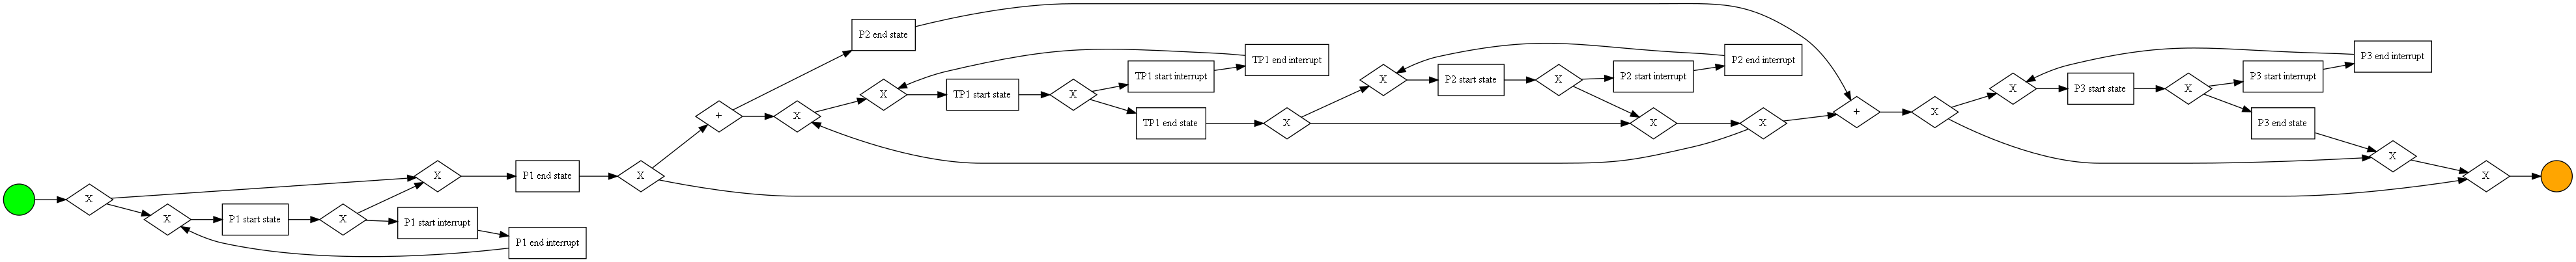

In [102]:
process_tree = pm4py.discover_process_tree_inductive(log)
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

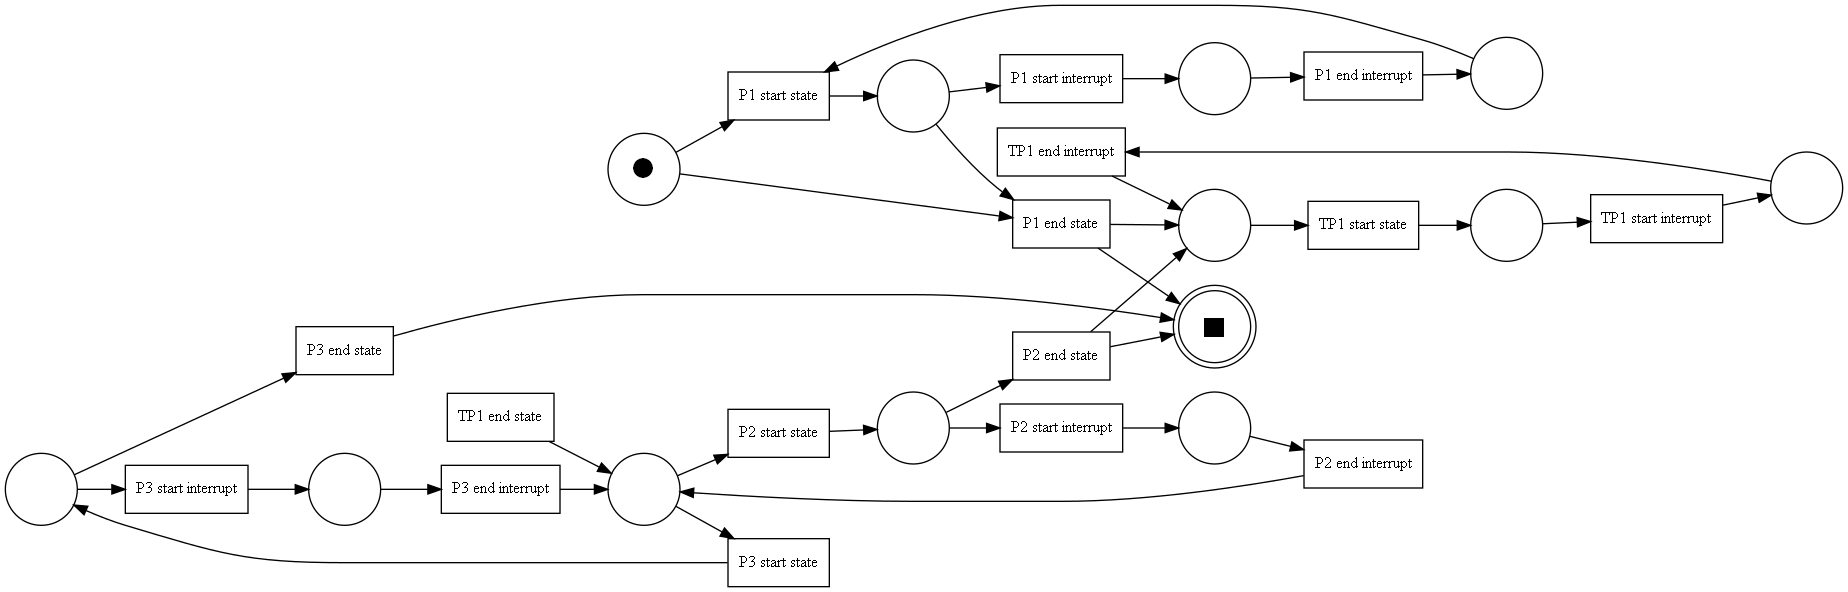

In [103]:
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(log)
pm4py.view_petri_net(net, initial_marking, final_marking)


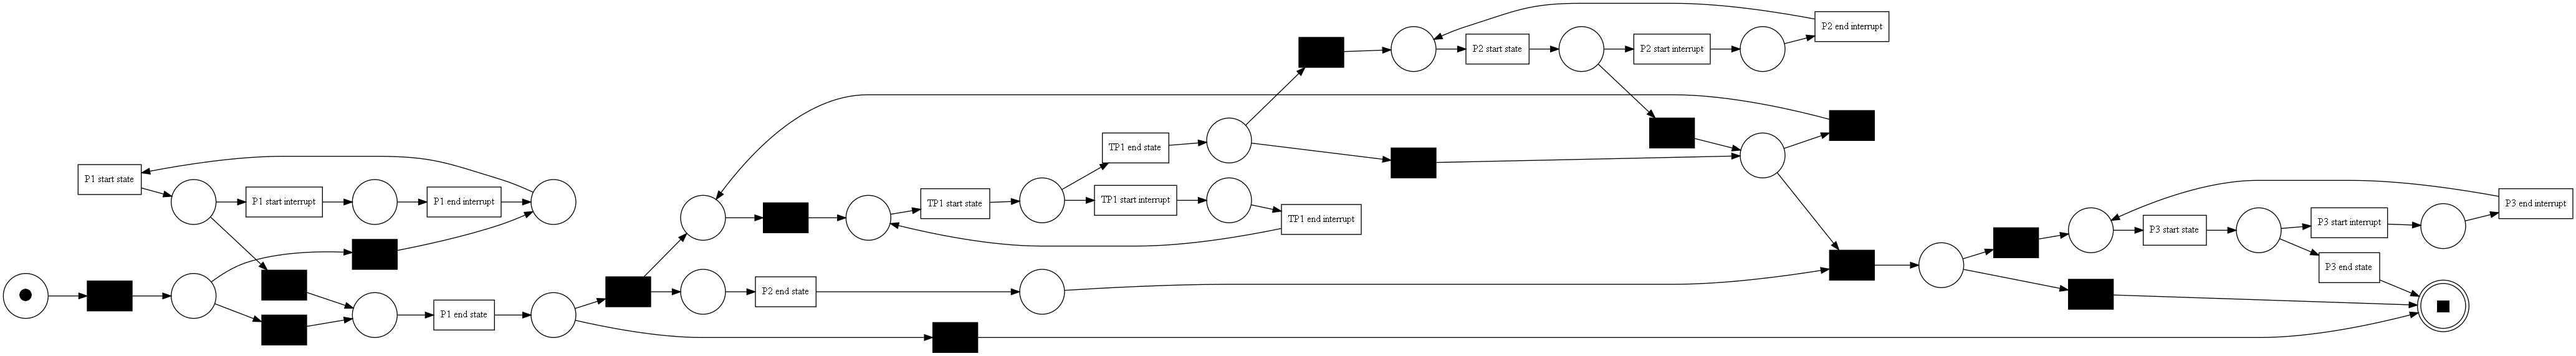

In [104]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log)
pm4py.view_petri_net(net, initial_marking, final_marking)

In [105]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log)
pn_visualizer.save(gviz, "inductive_frequency.png")
gviz.view()

replaying log with TBR, completed variants :: 100%|██████████| 68/68 [00:00<00:00, 397.42it/s]


'C:\\Users\\Sebas\\AppData\\Local\\Temp\\tmp37g6_2qw.gv.png'

In [106]:
pm4py.discover_directly_follows_graph(log)

(Counter({('P1 start state', 'P1 end state'): 909,
          ('P1 end state', 'TP1 start state'): 910,
          ('TP1 start state', 'TP1 end state'): 3003,
          ('TP1 end state', 'TP1 start state'): 1184,
          ('TP1 end state', 'P2 start state'): 910,
          ('P2 start state', 'P2 end state'): 910,
          ('P2 end state', 'TP1 start state'): 909,
          ('TP1 end state', 'P3 start state'): 909,
          ('P3 start state', 'P3 end state'): 909,
          ('P1 start state', 'P1 start interrupt'): 164,
          ('P1 start interrupt', 'P1 end interrupt'): 164,
          ('P1 end interrupt', 'P1 start state'): 164,
          ('P3 start state', 'P3 start interrupt'): 239,
          ('P3 start interrupt', 'P3 end interrupt'): 239,
          ('P3 end interrupt', 'P3 start state'): 239,
          ('P2 start state', 'P2 start interrupt'): 80,
          ('P2 start interrupt', 'P2 end interrupt'): 80,
          ('P2 end interrupt', 'P2 start state'): 80,
          ('TP1 start

In [117]:
df = df_raw.copy()
df['Material_type'] = df['Material'].str[:10]
df.head()

,Time,Resource,State,Activity,Expected End Time,Material,Target location,Material_type
0,14.532972,R3,Breakdownstate_2,start state,44.532972,NaN,NaN,NaN
1,23.622187,R1,P1,start state,34.421601,Material_1 instance N.0,NaN,Material_1
2,34.421601,R1,P1,end state,34.421601,Material_1 instance N.0,NaN,Material_1
3,34.421601,TR1,TP1,start state,34.682712,Material_1 instance N.0,R1,Material_1
4,34.682712,TR1,TP1,end state,34.682712,Material_1 instance N.0,R1,Material_1


In [157]:
df_process_lengths = pd.DataFrame({'Material_type': ['Material_1', 'Material_2'], 'length': [3, 4]})
df_process_lengths

,Material_type,length
0,Material_1,3
1,Material_2,4


In [154]:
starts = df.loc[(df['Activity'] == "end state") & (df['State'].isin(['P1', 'P2', 'P3', 'P4']))].groupby(by='Material')['Activity'].count()
starts.name = "process_starts"
ends = df.loc[(df['Activity'] == "end state") & (df['State'].isin(['P1', 'P2', 'P3', 'P4']))].groupby(by='Material')['Activity'].count()
ends.name = "process_ends"
df_finished_material = pd.merge(df[['Material_type', 'Material']].drop_duplicates(), starts.to_frame().reset_index())
df_finished_material = pd.merge(df_finished_material, ends.to_frame().reset_index())
df_finished_material = pd.merge(df_finished_material, df_process_lengths)
df_finished_material['has_finished'] = (df_finished_material['process_starts'] == df_finished_material['length']) &  (df_finished_material['process_ends'] == df_finished_material['length'])
df_finished_material = df_finished_material.loc[df_finished_material['has_finished']]
df_finished_material

,Material_type,Material,process_starts,process_ends,length,has_finished
0,Material_1,Material_1 instance N.0,3,3,3,True
1,Material_1,Material_1 instance N.1,3,3,3,True
2,Material_1,Material_1 instance N.4,3,3,3,True
3,Material_1,Material_1 instance N.5,3,3,3,True
4,Material_1,Material_1 instance N.6,3,3,3,True
...,...,...,...,...,...,...
1816,Material_2,Material_2 instance N.1793,4,4,4,True
1817,Material_2,Material_2 instance N.1800,4,4,4,True
1818,Material_2,Material_2 instance N.1802,4,4,4,True
1819,Material_2,Material_2 instance N.1813,4,4,4,True


In [155]:
min = df.groupby(by='Material')['Time'].min()
min.name = "Start_time"
max = df.groupby(by='Material')['Time'].max()
max.name = "End_time"
tp = max - min
tp.name = "Throughput_time"

In [156]:
df_tp = pd.merge(df[['Material_type', 'Material']].drop_duplicates(), tp.to_frame().reset_index())
df_tp = pd.merge(df_tp, min.to_frame().reset_index())

In [120]:
import plotly.figure_factory as ff
import numpy as np

# Group data together
# hist_data = [x1, x2, x3, x4]

grouped = df_tp.groupby(by='Material_type')['Throughput_time'].apply(list)

values = grouped.values

group_labels = grouped.index

# Create distplot with custom bin_size
fig = ff.create_distplot(values, group_labels, bin_size=.2)
fig.show()

In [121]:
import plotly.express as px

fig = px.line(df_tp, x="Start_time", y="Throughput_time", color='Material_type')
fig.show()

In [122]:
import plotly.express as px

fig = px.scatter(df_tp, x="Start_time", y="Throughput_time", color="Material_type")

fig.show()

In [123]:
df['last_activity'] = df.groupby(by=['Resource'])

ValueError: Length of values (6) does not match length of index (34104)

In [ ]:
df.loc[df['State'].str.contains('P')].groupby(by=['Resource'])

,Time,Resource,State,Activity,Expected End Time,Material,Target location
1,22.523481,R1,P1,start state,33.322895,Material_1 instance N.0,NaN
2,33.322895,R1,P1,end state,33.322895,Material_1 instance N.0,NaN
3,33.322895,TR1,TP1,start state,33.584006,Material_1 instance N.0,R1
4,33.584006,TR1,TP1,end state,33.584006,Material_1 instance N.0,R1
5,33.584006,TR1,TP1,start state,33.845117,Material_1 instance N.0,R2
...,...,...,...,...,...,...,...
36270,39996.045273,R3,P1,end state,39996.045273,Material_1 instance N.1940,NaN
36271,39996.045273,TR2,TP1,start state,39996.306384,Material_1 instance N.1940,R3
36272,39996.306384,TR2,TP1,end state,39996.306384,Material_1 instance N.1940,R3
36273,39996.306384,TR2,TP1,start state,39996.678606,Material_1 instance N.1940,R1
